# 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 데이터 불러오기

이 데이터셋은 Iowa주 Ames에 있는 주거용 주택에 대한 정보와 가격 데이터이다.

우리의 목표는 주택을 설명하는 79개의 설명 변수들로 주택의 가격을 예측하는 것이다.

In [2]:
path = './data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# 데이터 살펴보기

모든 변수에 대한 설명은 대회 데이터 파일의 data_description.txt 파일을 참고했다.

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EDA

## train test 병합

In [9]:
num_train = train.shape[0]
id = test.Id

df = pd.concat([train, test])
df.shape

(2919, 81)

## 상관관계 확인

In [10]:
# corr = df.corr()
# sns.heatmap(corr)

## 예측 타겟(SalePrice) 분포 확인

<Axes: >

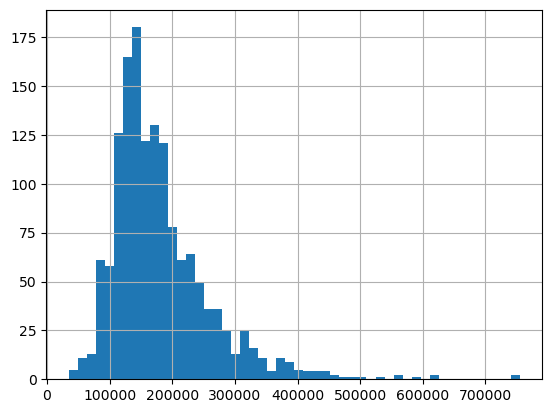

In [11]:
df.SalePrice.hist(bins=50)

## 결측치 확인

전체 결측치 확인

In [12]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

~~결측치가 절반 이상이면 삭제~~

우선 결측치가 절반 이상인 columns 를 살펴보겠다.

In [13]:
df.isna().sum()[df.isna().sum()>len(df)/2]

Alley          2721
PoolQC         2909
Fence          2348
MiscFeature    2814
dtype: int64

Alley는 주택에 접근하는 골목의 유형으로 Grvl은 자갈길, Pave는 포장길, Nan은 골목이 없음을 뜻한다고 한다.

In [14]:
df.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

Alley와 비슷한 데이터로는 Street column으로 주택에 접근하는 도로 유형에 대한 정보이다.

In [15]:
df.Street.value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

Alley의 결측치는 NoAlley라는 이름으로 대체시킨다.

In [16]:
df.Alley = df.Alley.fillna('NoAlley')
df.Alley.value_counts()

NoAlley    2721
Grvl        120
Pave         78
Name: Alley, dtype: int64

그 다음은 PoolQC이다. PoolQC는 Pool quality의 약자로 각 변수의 의미는 아래와 같다.
- Ex : Excellent
- Gd : Good
- TA : Average/Typical
- Fa : Fair
- NA : No Pool

In [17]:
df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

PoolQC의 결측치는 NoPool로 대체시켜주었다.

In [18]:
df.PoolQC = df.PoolQC.fillna('NoPool')
df.PoolQC.value_counts()

NoPool    2909
Ex           4
Gd           4
Fa           2
Name: PoolQC, dtype: int64

Fence는 울타리의 유무를, MiscFeature는 다른 column에서 다루지 않는 기타 기능을 의미한다고 한다.

Fence의 결측치는 울타리가 없음을, MiscFeature의 결측치는 기타 기능이 없음을 뜻하므로 각각 NoFance와 NoMiscFeature로 대체해주었다.

In [19]:
df.Fence = df.Fence.fillna('NoFence')
df.Fence.value_counts()

NoFence    2348
MnPrv       329
GdPrv       118
GdWo        112
MnWw         12
Name: Fence, dtype: int64

In [20]:
df.MiscFeature = df.MiscFeature.fillna('NoMiscFeature')
df.MiscFeature.value_counts()

NoMiscFeature    2814
Shed               95
Gar2                5
Othr                4
TenC                1
Name: MiscFeature, dtype: int64

이제 남은 결측치를 살펴보자.

절반 이상인 결측치는 사라졌으나 절반에 가까운 FireplaceQu와 몇 백개가 결측치인 LotFrontage가 눈에 띈다.

In [21]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

LotFrontage는 주택과 연결된 거리의 피트 단위의 직선 거리이다.

데이터를 확인해보니 21피트 이하의 데이터는 존재하지 않는 것을 확인할 수 있다.

그러므로, 해당 데이터의 결측치들은 21피트 이하이던가 단순히 기록이 되지 않은 것 둘중 하나일 것이다.

~~이 변수는 나중에 다른 변수들을 사용해 결측치를 예측하는 선형 회귀 모델을 만들어보자.~~

<Axes: >

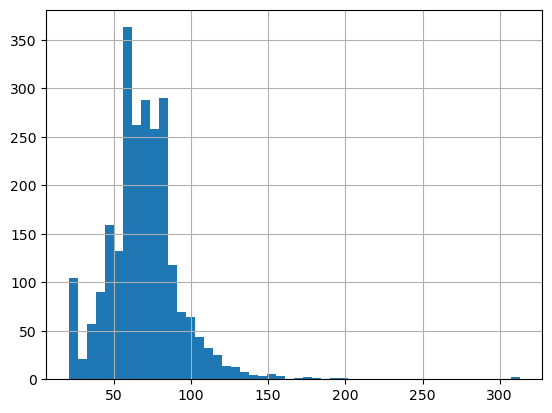

In [22]:
display(df.LotFrontage.hist(bins=50))

In [23]:
print(f'min LotFrontage is: {df.LotFrontage.min()}')

min LotFrontage is: 21.0


FireplaceQu는 벽난로의 유무를 나타내는 변수이다. Nan은 벽난로가 없음을 나타내므로 결측치를 NoFireplace로 대치해주자.

In [24]:
df.FireplaceQu = df.FireplaceQu.fillna('NoFireplace')
df.FireplaceQu.value_counts()

NoFireplace    1420
Gd              744
TA              592
Fa               74
Po               46
Ex               43
Name: FireplaceQu, dtype: int64

이제 나머지 결측치들을 살펴보도록 하자.

변수의 이름들을 살펴보다보니 Exterior..., MasVnr... 등 비슷한 이름을 가진 변수들을 발견해 살펴보기로 했다.

In [25]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

In [26]:
df.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

우선 Exterior로 시작하는 두 변수는 주택 외장재에 대한 정보이다. 1st는 첫 번째 외장재이고, 2nd는 두 가지 이상의 자재를 사용 시 기록되었다고 나와있다.

그러나 첫 번째 외장재와 두 번째 외장재가 동일한 경우가 다수 발견된 것으로 보아 한 가지의 자재만 사용한 경우도 2nd까지 전부 표기한 것을 알 수 있다.

In [27]:
df.loc[:, ['Exterior1st', 'Exterior2nd']].value_counts()

Exterior1st  Exterior2nd
VinylSd      VinylSd        1005
MetalSd      MetalSd         437
HdBoard      HdBoard         383
Wd Sdng      Wd Sdng         353
Plywood      Plywood         186
CemntBd      CmentBd         124
BrkFace      BrkFace          44
WdShing      Wd Shng          41
HdBoard      Plywood          41
AsbShng      AsbShng          35
Stucco       Stucco           33
BrkFace      Wd Sdng          20
Plywood      Brk Cmn          18
Wd Sdng      Wd Shng          18
             Plywood          17
WdShing      Plywood          10
VinylSd      Wd Shng           9
BrkFace      Plywood           8
Wd Sdng      HdBoard           7
Plywood      HdBoard           6
HdBoard      ImStucc           6
AsbShng      Plywood           5
HdBoard      Wd Shng           5
Stucco       Wd Shng           4
BrkComm      Brk Cmn           4
Plywood      Wd Sdng           4
Wd Sdng      MetalSd           4
Plywood      ImStucc           4
HdBoard      Wd Sdng           3
BrkFace      HdBoa

해당 두 변수의 결측치가 동일한 주택에서 나온 것을 확인할 수 있었다.

In [28]:
df.loc[(df.Exterior1st.isna() & df.Exterior2nd.isna()), ['Id', 'Exterior1st', 'Exterior2nd']]

,Id,Exterior1st,Exterior2nd
691,2152,NaN,NaN


벽이 없는 주택은 존재하지 않을 것이므로, 우리는 이 것이 결측치인 것을 확신할 수 있었다.

그래서 해당 결측치를 어떻게 채워줄지 고민하다가

In [29]:
df[df.Id == 2152]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,2152,30,RL,85.0,19550,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,1,2008,WD,Normal,NaN


MasVnrType과 MasVnrArea

In [30]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

각각 24개와 23개의 결측치중에 23개가 곂치는 것을 확인할 수 있다.

In [31]:
df[df.MasVnrType.isna() & df.MasVnrArea.isna()].shape

(23, 81)

In [67]:
df[df.MasVnrType.isna() & df.MasVnrArea.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,5,2010,WD,Normal,216500.0
529,530,20,RL,NaN,32668,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NoPool,NoFence,NoMiscFeature,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NoFireplace,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,12,2008,New,Partial,182000.0
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NoFireplace,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,11,2007,New,Partial,199900.0
1243,1244,20,RL,107.0,13891,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,9,2006,New,Partial,465000.0
1278,1279,60,RL,75.0,9473,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,3,2008,WD,Normal,237000.0
231,1692,60,RL,NaN,12891,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,U

Bsmt...들을 살펴보자. Bsmt는 지하실과 관련된 변수로 관련 변수 목록은 아래와 같다.
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinSF1
- BsmtFinType2
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 결측치는 지하실이 존재하지 않을 때라고 한다.

In [83]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

BsmtFinType1과 BsmtFinType2가 동시에 결측된 값을 살펴보겠다.

In [79]:
df.loc[:, ['BsmtFinType1', 'BsmtFinType2']].value_counts()

BsmtFinType1  BsmtFinType2
Unf           Unf             851
GLQ           Unf             790
ALQ           Unf             333
Rec           Unf             223
BLQ           Unf             197
LwQ           Unf              99
ALQ           Rec              36
BLQ           Rec              34
ALQ           BLQ              30
              LwQ              27
BLQ           LwQ              23
Rec           LwQ              20
              ALQ              19
              BLQ              19
GLQ           Rec              19
              LwQ              17
LwQ           Rec              16
GLQ           ALQ              15
LwQ           ALQ              14
              GLQ              14
              BLQ              11
BLQ           GLQ              10
Rec           GLQ               7
GLQ           BLQ               7
BLQ           ALQ               4
ALQ           GLQ               3
BLQ           BLQ               1
dtype: int64

BsmtFinType1와 BsmtFinType2의 결측치 각각 79개, 80개 중에 79개가 같은 행에서 없는 것을 볼 수 있다.

그러면 BsmtFinType2에만 결측치가 있는 것은 어떤 경우일까?

In [52]:
df[df.BsmtFinType2.isna() & ~df.BsmtFinType1.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0,10,2009,WD,Normal,284000.0


BsmtFinSF2에 완성된 영역이 있는데 결측치인것으로 보아 지하실이 없는 경우는 아닌 것 같다.

BsmtFinSF2의 면적이 0이 아닌 경우와 BsmtUnfSF이 0이 아닌 경우를 살펴보고 적당한 값으로 대치해주겠다.

In [74]:
df.loc[(df.BsmtFinSF2 != 0) & (df.BsmtUnfSF != 0), ['BsmtFinType1', 'BsmtFinType2']].value_counts()

BsmtFinType1  BsmtFinType2
BLQ           Rec             33
ALQ           Rec             32
              BLQ             28
              LwQ             17
Rec           BLQ             16
              LwQ             16
BLQ           LwQ             15
GLQ           ALQ             15
              Rec             15
Rec           ALQ             13
LwQ           BLQ             11
              Rec             10
GLQ           LwQ              9
BLQ           GLQ              7
LwQ           ALQ              7
              GLQ              5
GLQ           BLQ              4
BLQ           ALQ              4
Rec           GLQ              4
ALQ           GLQ              3
BLQ           BLQ              1
GLQ           Unf              1
dtype: int64

결과를 살펴보니 자하실의 첫 번째 영역이 GLQ(양호한 거주구역)인 경우에 두 번째 영역은 ALQ(평균 거주구역)와 Rec(평균 오락실)로 나뉘었다.

둘 중에 어떤 값으로 대치하는게 나을까 고민하다가

# 전처리

In [ ]:
sdfasdfsf

## 사용하지 않는 열 삭제

## 범주형 변수 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 모델링

## 데이터 split

In [ ]:
train = df[:num_train]
test = df[num_train:]

In [ ]:
train_X, train_y = train.drop('SalePrice', axis=1), train.SalePrice
test_X = test.drop('SalePrice', axis=1)

In [ ]:
# from sklearn.model_selection import train_test_split

# train_test_split(train)

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

## 모델 import

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.metrics import mean_squared_error

## 모델 학습

In [ ]:
random_state = 42
cv_num = 5

In [ ]:
models = {
    'lr' : LinearRegression(random_state=random_state),
    'knn' : KNeighborsRegressor(),
    'tree' : DecisionTreeRegressor(random_state=random_state),
    'bag' : BaggingRegressor(random_state=random_state),
    'forest' : RandomForestRegressor(random_state=random_state),
    'ada' : AdaBoostRegressor(random_state=random_state),
    'gbc' : GradientBoostingRegressor(random_state=random_state),
    'xgb' : XGBRegressor(random_state=random_state),
    'lgbm' : LGBMRegressor(random_state=random_state),
    'cat' : CatBoostRegressor(random_state=random_state, verbose=False, allow_writing_files=False),
}

scores = {}

for name, model in models.items():
    model.fit(train_X, train_y)
    acc = cross_val_score(model, train_X, train_y, scoring = "squared", cv = cv_num)
    scores[name] = acc

In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

In [ ]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

## Feature importance, 차원축소

## 하이퍼 파라미터 튜닝

In [ ]:
import optuna

In [ ]:
# # example
# def objective(trial):
#     optimizer = trial.suggest_categorical("optimizer", ["MomentumSGD", "Adam"])   # Categorical parameter
#     num_layers = trial.suggest_int("num_layers", 1, 3)                            # Integer parameter
#     num_channels = trial.suggest_int("num_channels", 32, 512, log=True)           # Integer parameter (log)
#     num_units = trial.suggest_int("num_units", 10, 100, step=5)                   # Integer parameter (discretized)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 1.0)                  # Floating point parameter
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)    # Floating point parameter (log)
#     drop_path_rate = trial.suggest_float("drop_path_rate", 0.0, 1.0, step=0.1)    # Floating point parameter (discretized)

In [ ]:
def objective(trial, name):
    if name == 'lr':
        param = {
            'C': trial.suggest_float('C', 0.01, 10.0), # 규제 강도, 값이 작아질 수록 강도가 강해짐, 양수여야 함
            'max_iter': trial.suggest_int('max_iter', 100, 2000, step=100), # 반복 횟수
            'random_state': random_state,
        }
        model = LogisticRegression(**param)

    score = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv_num)
    return score.mean()

In [ ]:
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(lambda trial : objective(trial, 'lr'), n_trials=100)

print(f'Best score: {study_lr.best_trial.value},\nBest params: {study_lr.best_trial.params}')

display(optuna.visualization.plot_param_importances(study_lr))
display(optuna.visualization.plot_optimization_history(study_lr))

## 모델 재학습

In [ ]:
models2 = {
    'lr' : LinearRegression(random_state=random_state),
    'knn' : KNeighborsRegressor(),
    'tree' : DecisionTreeRegressor(random_state=random_state),
    'bag' : BaggingRegressor(random_state=random_state),
    'forest' : RandomForestRegressor(random_state=random_state),
    'ada' : AdaBoostRegressor(random_state=random_state),
    'gbc' : GradientBoostingRegressor(random_state=random_state),
    'xgb' : XGBRegressor(random_state=random_state),
    'lgbm' : LGBMRegressor(random_state=random_state),
    'cat' : CatBoostRegressor(random_state=random_state, verbose=False, allow_writing_files=False),
}

scores2 = {}

for name, model in models2.items():
    model.fit(train_X, train_y)
    acc = cross_val_score(model, train_X, train_y, scoring = "squared", cv = cv_num)
    scores[name] = acc

In [ ]:
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

## Bagging -> Voting

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
grid_hard = VotingRegressor(estimators = list(models2.items()),
                             voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, train_X, train_y, cv=cv_num)
grid_hard.fit(train_X, train_y)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

In [ ]:
grid_soft = VotingRegressor(estimators = list(models2.items()),
                             voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, train_X, train_y, cv=cv_num)
grid_soft.fit(train_X, train_y)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

## Stacking

In [ ]:
stack = StackingRegressor(estimators=list(models2.items()),
                           final_estimator=LinearRegression(),
                           cv=cv_num)

stack_cv = cross_val_score(stack, train_X, train_y, cv=cv_num)
stack.fit(train_X, train_y)

print("Stacking on test set score mean: {:.2f}". format(stack_cv.mean() * 100))

# 제출

In [ ]:
pred = grid_hard.predict(test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred.astype(int)
    })
submission.to_csv(f'submission_hard_volting.csv', index=False)

In [ ]:
pred = grid_soft.predict(test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred.astype(int)
    })
submission.to_csv(f'submission_soft_volting.csv', index=False)

In [ ]:
pred = stack.predict(test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred.astype(int)
    })
submission.to_csv(f'submission_stacking.csv', index=False)